In [5]:
import cv2

In [6]:
img1 = cv2.imread('../../DATA/dog_backpack.png')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread('../../DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

In [7]:
import matplotlib.pyplot as plt

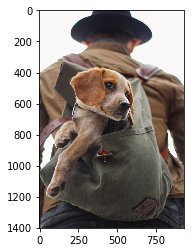

In [8]:
plt.imshow(img1)

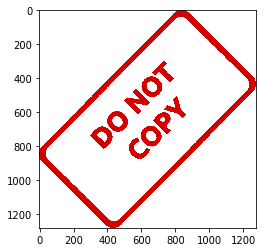

In [9]:
plt.imshow(img2)

In [10]:
img1.shape

(1401, 934, 3)

In [11]:
img2.shape

(1280, 1277, 3)

In [12]:
#Blending images of a same size 

In [13]:
img1 = cv2.resize(img1,(1200,1200))
img2 = cv2.resize(img2,(1200,1200))

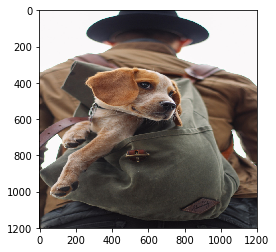

In [14]:
plt.imshow(img1)

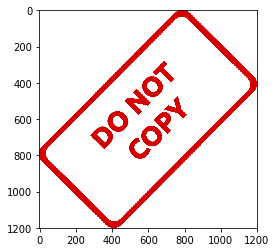

In [15]:
plt.imshow(img2)

In [24]:
blended = cv2.addWeighted(src1=img1,alpha=0.2,src2=img2,beta=0.8,gamma=0.5)

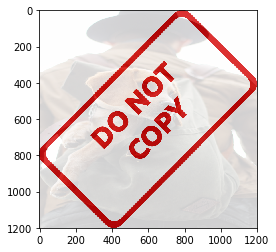

In [25]:
plt.imshow(blended)

In [26]:
#OVERLAY SMALL IMAGE ON TOP OF A LARGE IMAGE(NO BLENDING)
# Numpy reassignment

In [28]:
img1 = cv2.imread('../../DATA/dog_backpack.png')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread('../../DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)


In [29]:
img2 = cv2.resize(img2,(600,600))

In [30]:
img2.shape

(600, 600, 3)

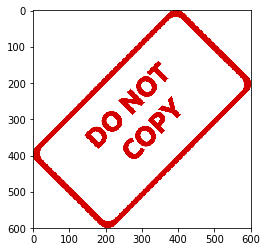

In [31]:
plt.imshow(img2)

In [62]:
large_img = img1
small_img = img2

In [63]:
x_offset =0
y_offset=0

In [64]:
x_end=x_offset +small_img.shape[1]
y_end = y_offset + small_img.shape[0]

In [65]:
small_img.shape

(600, 600, 3)

In [66]:
large_img[y_offset:y_end,x_offset:x_end]=small_img

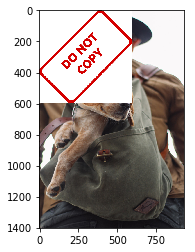

In [67]:
plt.imshow(large_img)

In [68]:
 #BLEND TOGETHER IMAGES OF DIFFERENCE SIZES

In [69]:
img1 = cv2.imread('../../DATA/dog_backpack.png')
img1 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img2 = cv2.imread('../../DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

In [32]:
img2 = cv2.resize(img2,(600,600))

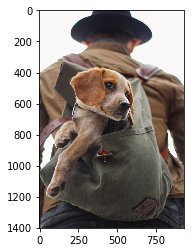

In [33]:
plt.imshow(img1)

In [44]:
img1.shape

(1401, 934, 3)

In [45]:
x_offset = 934-600
y_offset = 1401-600

In [46]:
rows,cols,channels = img2.shape

In [47]:
rows

600

In [48]:
roi = img1[y_offset:1401,x_offset:934]

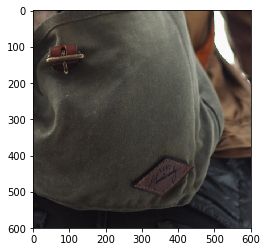

In [49]:
plt.imshow(roi)

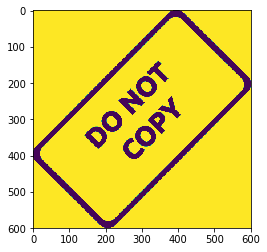

In [50]:
img2gray = cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)
plt.imshow(img2gray)

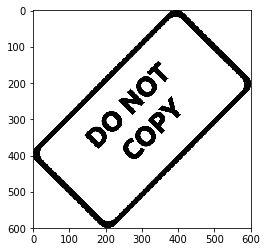

In [51]:
plt.imshow(img2gray,cmap='gray')

In [52]:
img2gray.shape

(600, 600)

In [53]:
#now going to create the mask

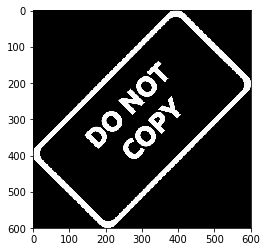

In [54]:
mask_inv = cv2.bitwise_not(img2gray)
plt.imshow(mask_inv,cmap='gray')

In [55]:
mask_inv.shape
#mask_inv not contain color channel

(600, 600)

In [56]:
import numpy as np

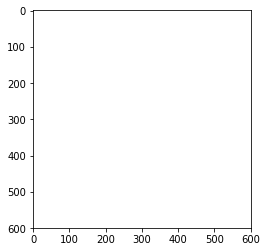

In [68]:
white_background = np.full(img2.shape,255,dtype=np.uint8)
#creating shape with 255
plt.imshow(white_background)


In [98]:
white_background.shape

(600, 600, 3)

In [93]:
bk = cv2.bitwise_or(white_background,white_background,mask=mask_inv)

In [94]:
bk.shape

(600, 600, 3)

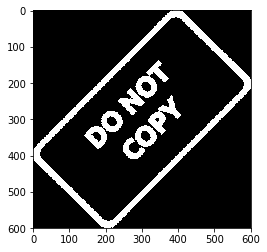

In [95]:
plt.imshow(bk)

In [109]:
fg = cv2.bitwise_or(img2,img2,mask=mask_inv)

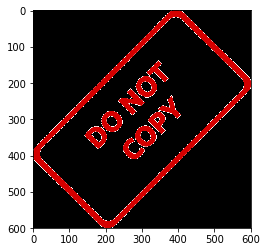

In [110]:
plt.imshow(fg)

In [111]:
final_roi= cv2.bitwise_or(roi,fg)

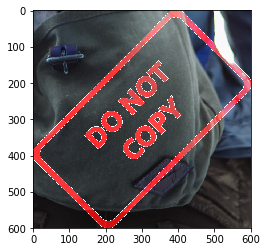

In [112]:
plt.imshow(final_roi)

In [113]:
large_img = img1
small_img = final_roi

In [114]:
large_img[y_offset:y_offset+small_img.shape[0],x_offset:x_offset+small_img.shape[1]]=small_img

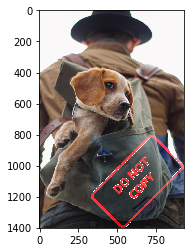

In [115]:
plt.imshow(large_img)